FACTORS INFLUENCING STUDENTS PERFORMANCE THE MOST.

First of all importing the necessary libraries and examining the datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(5)

In [2]:
df1 = pd.read_csv("nas-columns.csv")
df1.head()

,Name,Rename,Type
0,PQ2,Gender,Group
1,DIST,District,NaN
2,STATE,State,NaN
3,PQ3,Age,Group
4,PQ4,Category,NaN


In [3]:
df1.describe()

,Name,Rename,Type
count,63,63,25
unique,63,63,2
top,PQ8b,Use calculator,Group
freq,1,1,21


In [4]:
df2 = pd.read_csv("nas-labels.csv")
print list(df2)
df2[df2['Column'] == "Subjects"]

['Column', 'Name', 'Level', 'Rename']


,Column,Name,Level,Rename
87,Subjects,Language,L,Language
88,Subjects,Mathematics,M,Mathematics
89,Subjects,None,0,None
90,Subjects,Science,S,Science
91,Subjects,Social Science,O,Social Science


In [5]:
df3 = pd.read_csv("nas-pupil-marks.csv")
print df3.head()
df3.describe()

         STUID State  District  Gender  Age  Category  Same language  \
0  11011001001    AP         1       1    3         3              1   
1  11011001002    AP         1       2    3         4              2   
2  11011001003    AP         1       2    3         4              2   
3  11011001004    AP         1       2    3         3              2   
4  11011001005    AP         1       2    3         3              2   

   Siblings  Handicap  Father edu    ...     Express science views  Watch TV  \
0         5         2           1    ...                         3         3   
1         5         2           2    ...                         3         4   
2         5         2           1    ...                         3         4   
3         4         2           1    ...                         3         4   
4         5         2           1    ...                         3         2   

   Read magazine  Read a book  Play games Help in household  Maths %  \
0             

,STUID,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
count,1.853480e+05,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,...,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,92681.000000,93271.000000,90992.000000,89571.000000
mean,2.634978e+10,5.353292,1.516925,3.579148,2.543896,1.270826,3.557400,1.836880,2.058533,1.704955,...,2.147442,3.411761,2.964925,2.908297,3.325631,3.421855,32.244413,46.208704,36.414637,38.357868
std,9.313274e+09,4.165150,0.502246,1.198826,1.235319,0.583421,1.234595,0.481326,1.207070,1.161219,...,1.006731,0.989371,1.177285,1.105515,1.046522,1.131092,16.088122,21.828532,14.905728,15.133607
min,1.101100e+10,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.807117e+10,2.000000,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,21.670000,27.590000,25.930000,28.000000
50%,2.520125e+10,4.000000,2.000000,4.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,27.780000,43.330000,33.930000,36.000000
75%,3.503107e+10,8.000000,2.000000,4.000000,4.000000,2.000000,5.000000,2.000000,3.000000,2.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,37.930000,63.330000,44.640000,48.000000
max,4.502103e+10,28.000000,2.000000,6.000000,4.000000,2.000000,5.000000,2.000000,5.000000,5.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,100.000000,100.000000,100.000000,96.000000


In [6]:
ndf = df3[['STUID', 'State']]
print ndf.head()
df_new = df3
df_new.drop(df_new.columns[[0,1,2]], axis=1, inplace=True)
df_new.head()

         STUID State
0  11011001001    AP
1  11011001002    AP
2  11011001003    AP
3  11011001004    AP
4  11011001005    AP


,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,1,3,3,1,5,2,1,1,3,3,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,2,3,4,2,5,2,2,1,7,3,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,2,3,4,2,5,2,1,1,0,3,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,2,3,3,2,4,2,1,1,3,3,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,2,3,3,2,5,2,1,1,3,3,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [7]:
df_new['Subjects'] = df_new['Subjects'].map({'L':1, 'S':2, 'O':3, 'M':4, '0':0})
df_new['Use computer'] = df_new['Use computer'].map({"Yes":1,"No":0})
df_new.head()

,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,1,3,3,1,5,2,1,1,3,3,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,2,3,4,2,5,2,2,1,7,3,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,2,3,4,2,5,2,1,1,0,3,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,2,3,3,2,4,2,1,1,3,3,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,2,3,3,2,5,2,1,1,3,3,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [8]:
fin_col=['Gender', 'Age', 'Category','Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu','Father occupation', 'Mother occupation', 'Below poverty','Use calculator', 'Use computer', 'Use Internet', 'Use dictionary','Read other books', '# Books', 'Distance', 'Computer use','Library use', 'Like school', 'Subjects', 'Give Lang HW','Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW','Correct Math HW', 'Correct Scie HW', 'Correct SocS HW','Help in Study', 'Private tuition', 'English is difficult','Read English', 'Dictionary to learn', 'Answer English WB','Answer English aloud', 'Maths is difficult', 'Solve Maths','Solve Maths in groups', 'Draw geometry', 'Explain answers','SocSci is difficult', 'Historical excursions', 'Participate in SocSci','Small groups in SocSci', 'Express SocSci views','Science is difficult', 'Observe experiments', 'Conduct experiments','Solve science problems', 'Express science views', 'Watch TV','Read magazine', 'Read a book', 'Play games', 'Help in household','Maths %', 'Reading %', 'Science %', 'Social %']

Replacing the null values in the dataset with the median, since the mean can sometimes be more deviated due to presence of many outliers in the dataset.

In [9]:
for col in fin_col:
    df_new[col].fillna((df_new[col].median()), inplace=True)
    
df = df_new
print df.head()
df.describe()

   Gender  Age  Category  Same language  Siblings  Handicap  Father edu  \
0       1    3         3              1         5         2           1   
1       2    3         4              2         5         2           2   
2       2    3         4              2         5         2           1   
3       2    3         3              2         4         2           1   
4       2    3         3              2         5         2           1   

   Mother edu  Father occupation  Mother occupation    ...     \
0           1                  3                  3    ...      
1           1                  7                  3    ...      
2           1                  0                  3    ...      
3           1                  3                  3    ...      
4           1                  3                  3    ...      

   Express science views  Watch TV  Read magazine  Read a book  Play games  \
0                      3         3              4            3           4   
1 

,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
count,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,...,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000
mean,1.516925,3.579148,2.543896,1.270826,3.557400,1.836880,2.058533,1.704955,3.033192,1.659344,...,2.147442,3.411761,2.964925,2.908297,3.325631,3.421855,30.012375,44.778624,35.149771,37.139460
std,0.502246,1.198826,1.235319,0.583421,1.234595,0.481326,1.207070,1.161219,1.842996,1.505956,...,1.006731,0.989371,1.177285,1.105515,1.046522,1.131092,11.593347,15.551448,10.517431,10.586146
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000,27.780000,43.330000,33.930000,36.000000
50%,2.000000,4.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,1.000000,...,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,27.780000,43.330000,33.930000,36.000000
75%,2.000000,4.000000,4.000000,2.000000,5.000000,2.000000,3.000000,2.000000,4.000000,3.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,27.780000,43.330000,33.930000,36.000000
max,2.000000,6.000000,4.000000,2.000000,5.000000,2.000000,5.000000,5.000000,8.000000,8.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,100.000000,100.000000,100.000000,96.000000


Writing the marks obtained in particular subjects viz maths, science, social and reading into numpy arrays to perform operations on them.

In [10]:
reading = np.array(df["Reading %"]).astype("float")
sci = np.array(df["Science %"]).astype("float")
soc  = np.array(df["Social %"]).astype("float")
math = np.array(df["Maths %"]).astype("float")
performance = (reading+sci+soc+math)
bestper = np.max(performance)
poorper = np.min(performance)
avgper  = np.average(performance)

th = bestper-avgper
above_th = performance > th
arr = np.copy(performance)
arr[above_th] = 1
arr[~above_th]= 0

In [11]:
stc = pd.DataFrame(arr, columns=["Stclass"])
performance = pd.DataFrame(performance, columns=["performance"])
final_df = pd.concat([df, performance, stc], axis=1)
print final_df.head()
lable = final_df['Stclass']
Xdata = final_df[['Gender', 'Age', 'Category','Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',     'Father occupation', 'Mother occupation', 'Below poverty','Use calculator', 'Use computer', 'Use Internet', 'Use dictionary','Read other books', '# Books', 'Distance', 'Computer use','Library use', 'Like school', 'Subjects', 'Give Lang HW','Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW','Correct Math HW', 'Correct Scie HW', 'Correct SocS HW','Help in Study', 'Private tuition', 'English is difficult','Read English', 'Dictionary to learn', 'Answer English WB','Answer English aloud', 'Maths is difficult', 'Solve Maths','Solve Maths in groups', 'Draw geometry', 'Explain answers','SocSci is difficult', 'Historical excursions', 'Participate in SocSci','Small groups in SocSci', 'Express SocSci views','Science is difficult', 'Observe experiments', 'Conduct experiments','Solve science problems', 'Express science views', 'Watch TV','Read magazine', 'Read a book', 'Play games', 'Help in household']]

   Gender  Age  Category  Same language  Siblings  Handicap  Father edu  \
0       1    3         3              1         5         2           1   
1       2    3         4              2         5         2           2   
2       2    3         4              2         5         2           1   
3       2    3         3              2         4         2           1   
4       2    3         3              2         5         2           1   

   Mother edu  Father occupation  Mother occupation   ...     Read magazine  \
0           1                  3                  3   ...                 4   
1           1                  7                  3   ...                 4   
2           1                  0                  3   ...                 3   
3           1                  3                  3   ...                 3   
4           1                  3                  3   ...                 3   

   Read a book  Play games  Help in household  Maths %  Reading %  Science

In [12]:
Xdata.describe()

,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,Mother edu,Father occupation,Mother occupation,...,Science is difficult,Observe experiments,Conduct experiments,Solve science problems,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household
count,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,...,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000,185348.000000
mean,1.516925,3.579148,2.543896,1.270826,3.557400,1.836880,2.058533,1.704955,3.033192,1.659344,...,1.679182,2.449209,1.939028,2.198486,2.147442,3.411761,2.964925,2.908297,3.325631,3.421855
std,0.502246,1.198826,1.235319,0.583421,1.234595,0.481326,1.207070,1.161219,1.842996,1.505956,...,0.939155,0.933562,1.036838,1.021628,1.006731,0.989371,1.177285,1.105515,1.046522,1.131092
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.000000,4.000000
50%,2.000000,4.000000,3.000000,1.000000,4.000000,2.000000,2.000000,2.000000,3.000000,1.000000,...,1.000000,3.000000,2.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,2.000000,4.000000,4.000000,2.000000,5.000000,2.000000,3.000000,2.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,6.000000,4.000000,2.000000,5.000000,2.000000,5.000000,5.000000,8.000000,8.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In order to find out the most influencing factors, I have used ExtraTreesClassifier from scikit learn library of python.
Through this, we can get a sorted list of important features in our dataset and find out their relative importance.

Index([u'Like school', u'Use computer', u'Handicap', u'Participate in SocSci',
       u'Historical excursions', u'Answer English WB', u'Read other books',
       u'Help in household', u'Dictionary to learn', u'Use Internet',
       u'Solve Maths in groups', u'Observe experiments', u'Help in Study',
       u'Solve science problems', u'Give Math HW', u'English is difficult',
       u'Draw geometry', u'Maths is difficult', u'Science is difficult',
       u'Give Lang HW', u'Use dictionary', u'Express SocSci views',
       u'Small groups in SocSci', u'Correct Math HW', u'Explain answers',
       u'Answer English aloud', u'Private tuition', u'Give Scie HW',
       u'Express science views', u'Read English', u'Correct Scie HW',
       u'Give SoSc HW', u'Correct SocS HW', u'Correct Lang HW',
       u'Below poverty', u'Play games', u'Use calculator',
       u'SocSci is difficult', u'Gender', u'Conduct experiments',
       u'Solve Maths', u'Read magazine', u'Same language', u'# Books',
       u'D

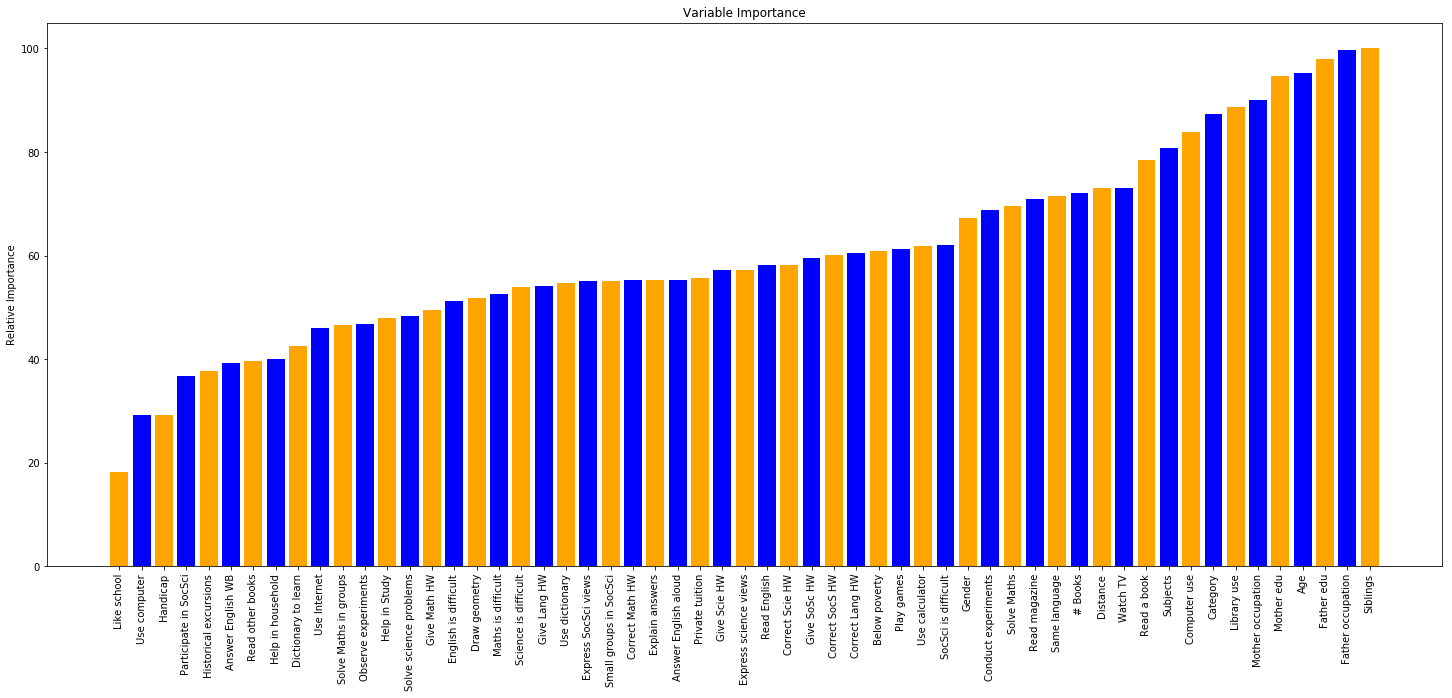

In [14]:
X = Xdata.astype("float")
X = np.array(X)
y = lable.astype("float")
y = np.array(y)

np.random.seed(5)
mdl = ExtraTreesClassifier()
mdl.fit(X, y)
imp_features=mdl.feature_importances_

imp_features = 100.0 * (imp_features / imp_features.max())
sorted_idx = np.argsort(imp_features)
#print ("The sorted list of important features is")
print Xdata.columns[sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .8
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.title('Variable Importance')
plt.ylabel('Relative Importance')
plt.bar(pos, imp_features[sorted_idx], align='center', color=['orange', 'blue'])
plt.xticks(pos, Xdata.columns[sorted_idx])
plt.show()

The most influencing factor is "Father's Occupation" and "Sibling" while the least among them is "Like School".